# Import packages

In [ ]:
%load_ext autoreload
%autoreload 2

import os, sys, sys
from pathlib import Path
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break
    
from data_wrangling import specific_utils, process_monkey_information, general_utils
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from neural_data_analysis.neural_analysis_tools.get_neural_data import neural_data_processing
from neural_data_analysis.neural_analysis_tools.visualize_neural_data import plot_neural_data, plot_modeling_result
from neural_data_analysis.neural_analysis_tools.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from neural_data_analysis.topic_based_neural_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from neural_data_analysis.topic_based_neural_analysis.planning_and_neural import planning_and_neural_class, pn_utils, pn_helper_class, pn_aligned_by_seg, pn_aligned_by_event
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class
from neural_data_analysis.neural_analysis_tools.cca_methods import cca_class, cca_utils, cca_cv_utils
from neural_data_analysis.neural_analysis_tools.cca_methods.cca_plotting import cca_plotting, cca_plot_lag_vs_no_lag, cca_plot_cv
from machine_learning.ml_methods import regression_utils, regz_regression_utils, ml_methods_class, classification_utils, ml_plotting_utils, ml_methods_utils
from planning_analysis.show_planning import nxt_ff_utils, show_planning_utils
from neural_data_analysis.neural_analysis_tools.gpfa_methods import elephant_utils, fit_gpfa_utils, plot_gpfa_utils, gpfa_helper_class
from neural_data_analysis.neural_analysis_tools.align_trials import time_resolved_regression, time_resolved_gpfa_regression,plot_time_resolved_regression

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca
import quantities as pq

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# retrieve data

In [2]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [3]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [4]:
reduce_y_var_lags = False
planning_data_by_point_exists_ok = False
y_data_exists_ok = False

pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 225 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 225 rows
Retrieving shared_stops_near_ff_df succeeded
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
[Note] When calling modify_position_of_ff_with_big_angle_for_finding_null_arc, Even with `remove_i_o_modify_rows_with_big_ff_angles=True`, some rows may still be removed (e.g., negative ff_y_relative). Use this function mainly for curvature calculation.
Retrievin

# cur ff first visible

Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0416/ff_dataframe.h5
Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
new_seg_duration is now 1.0, and post_event_window is now 0.75
Dropped 20 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['cur_cntr_arc_curv', 'cur_opt_arc_curv', 'nxt_cntr_arc_curv', 'nxt_opt_arc_curv', 'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading', 'angle_opt_cur_end_to_nxt_ff', 'angle_cntr_cur_end_to_nxt_ff', 'target_last_seen_angle_to_boundary', 'monkey_y_target_last_seen', 'target_last_seen_angle', 'monkey_x_target_last_seen', 'time_since_target_last_seen', 'monkey_angle_target_last_seen', 'distance_from_monkey_pos_target_last_seen', 'd_heading_since_target_last_seen', 'cum_distance_since_target_last_seen', 'time_target_last_seen', 'cum_distance_when_target_last_seen', 'target_last_seen_dist

Timepoints: 100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


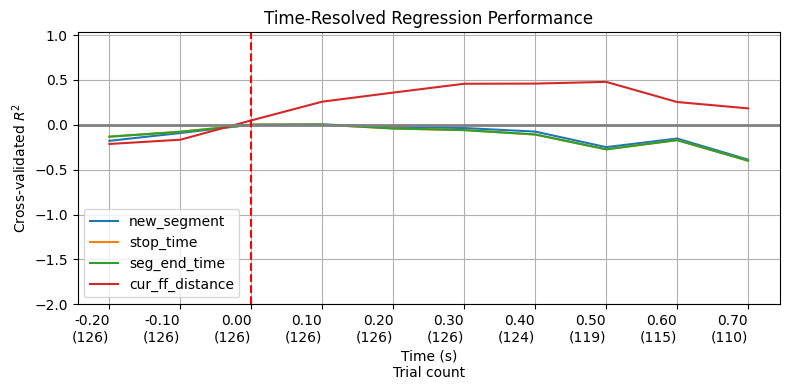

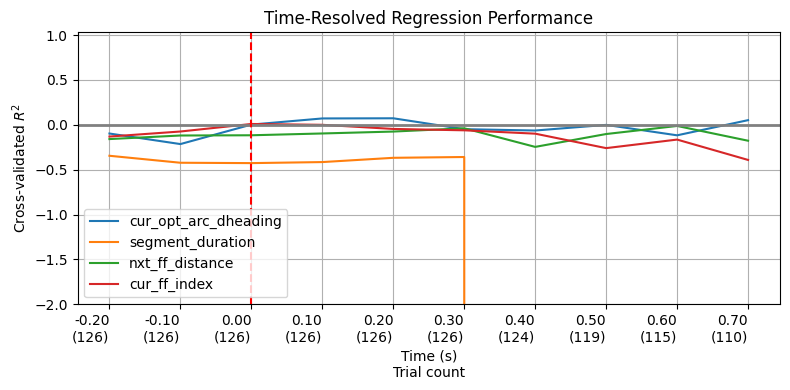

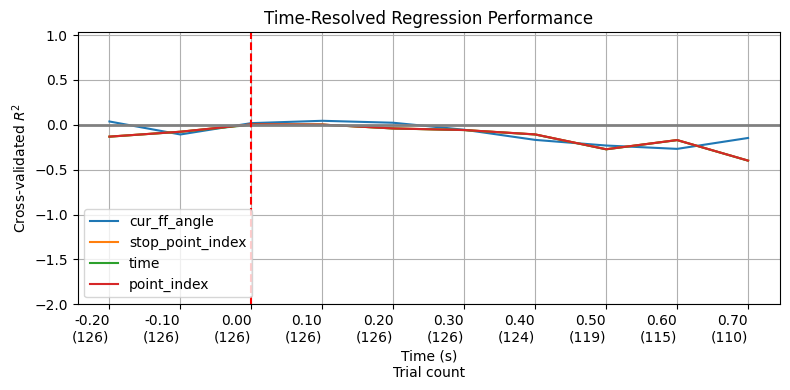

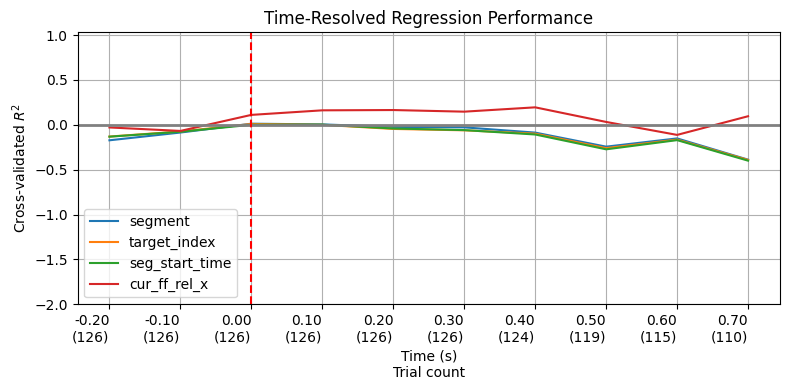

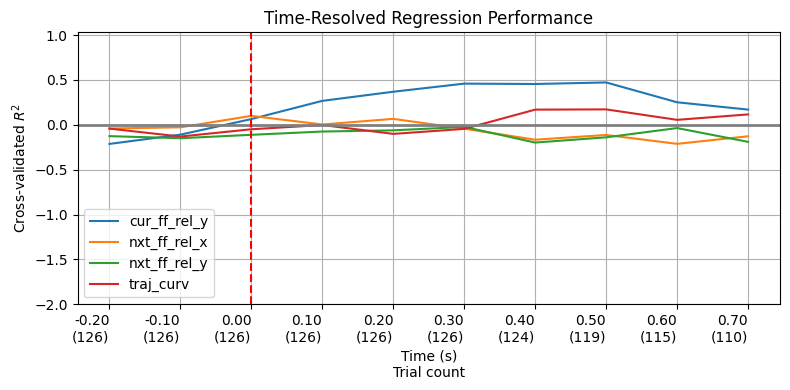

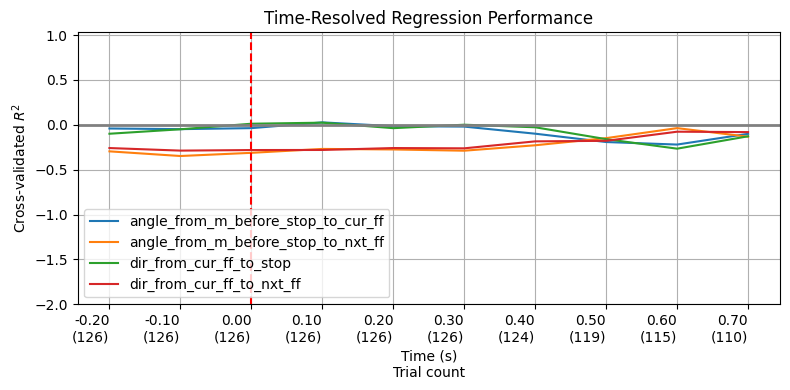

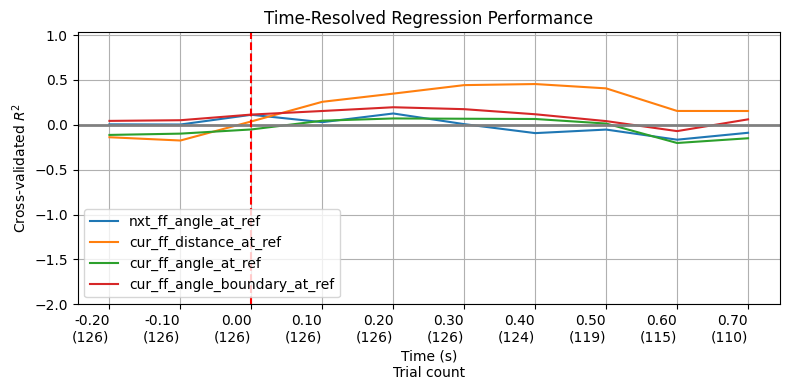

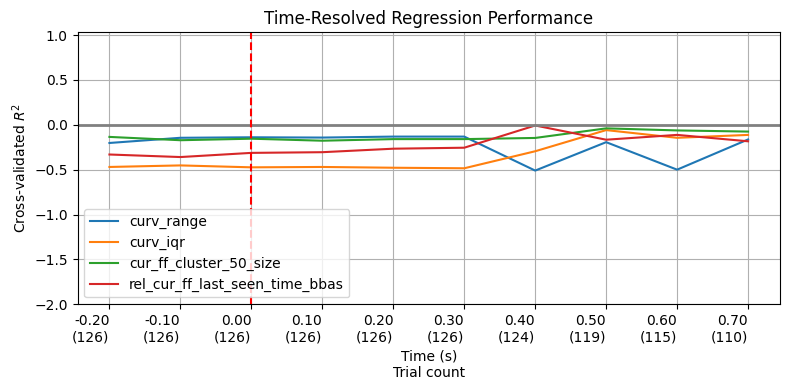

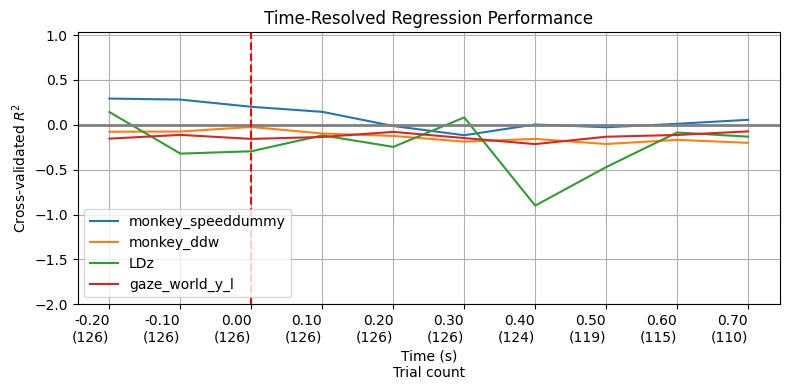

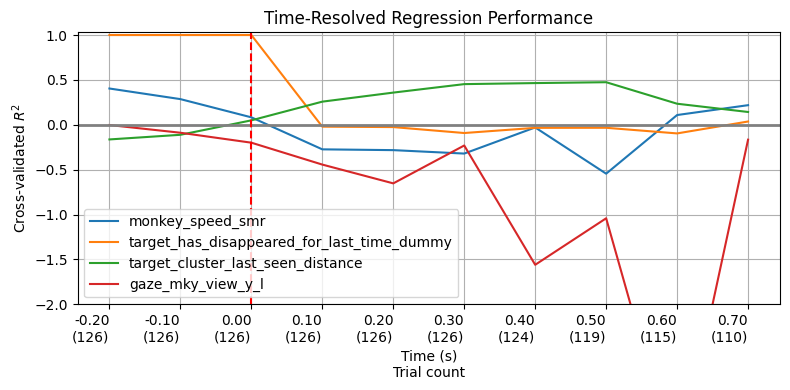

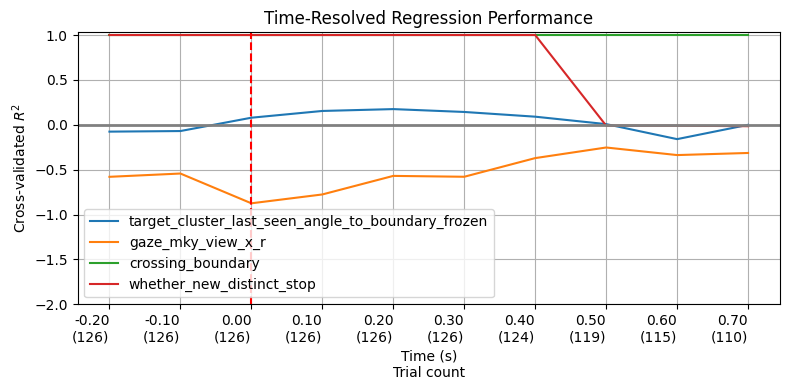

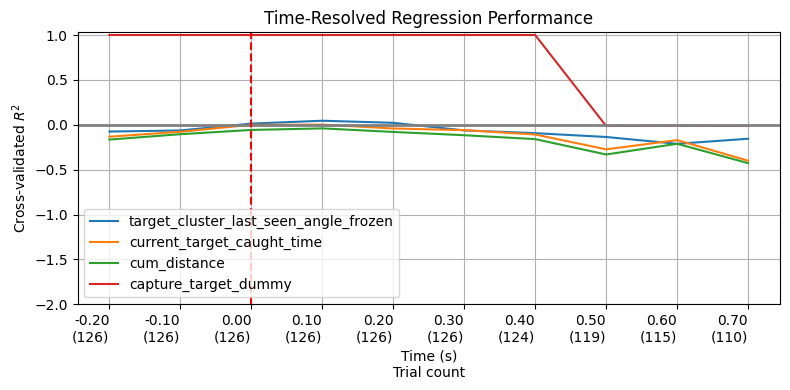

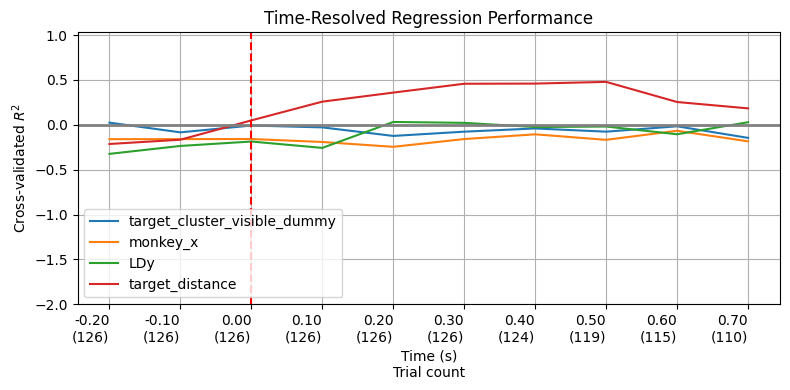

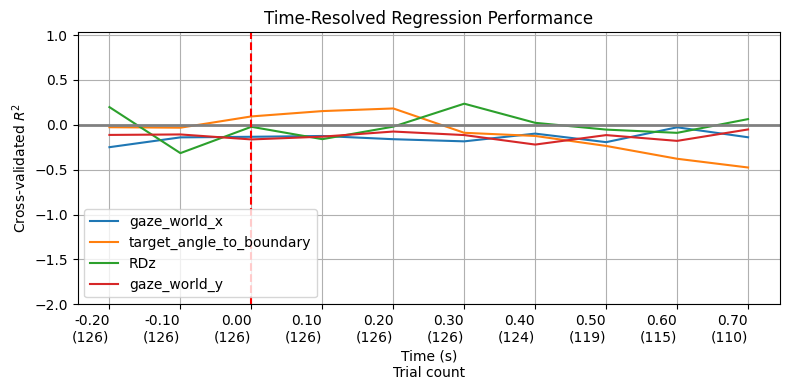

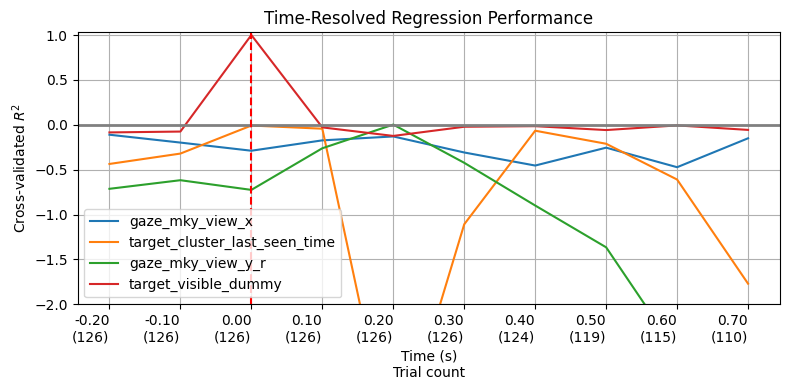

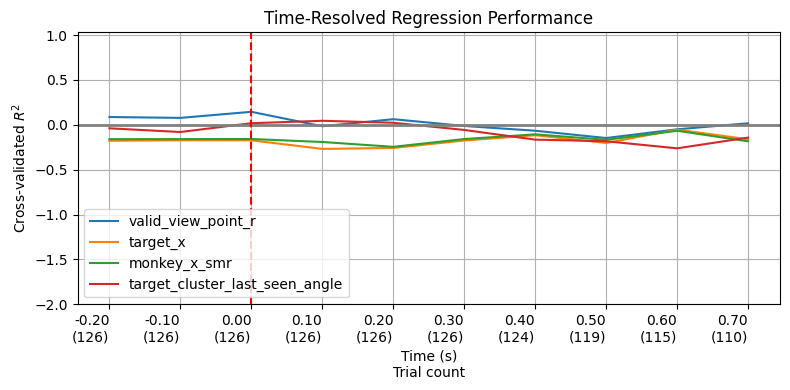

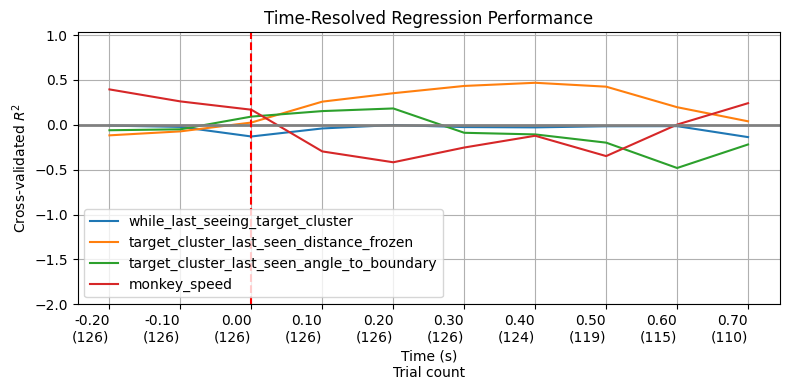

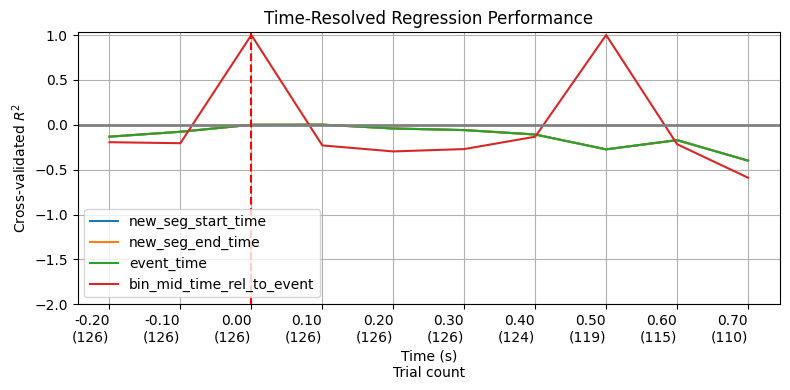

In [5]:
pn.streamline_preparing_event_aligned_data(cur_or_nxt='cur', first_or_last='first')

Timepoints: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


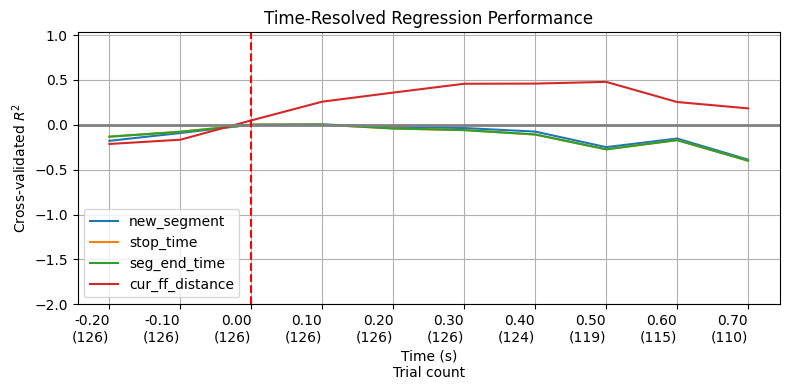

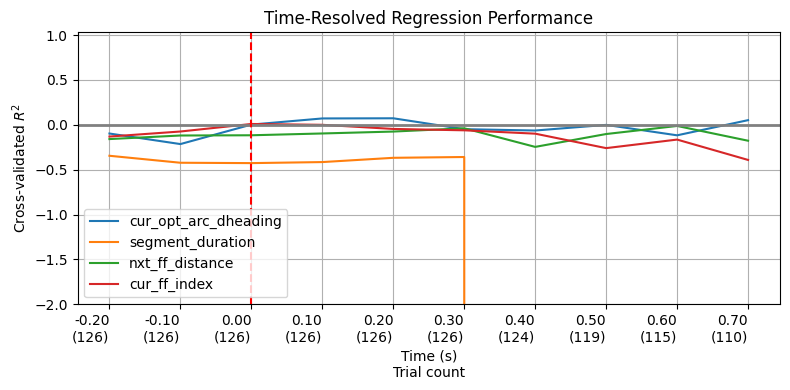

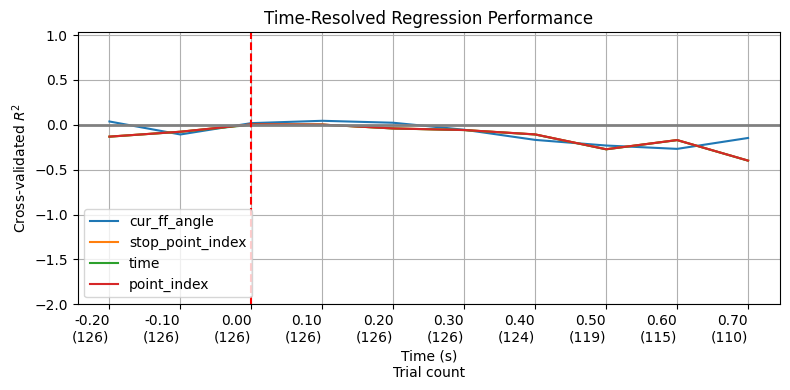

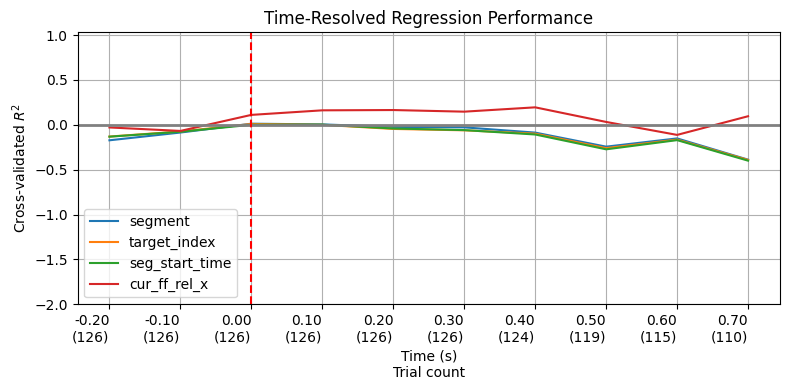

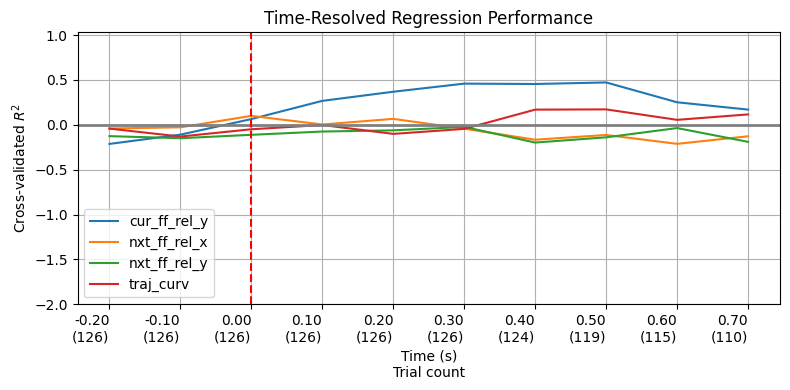

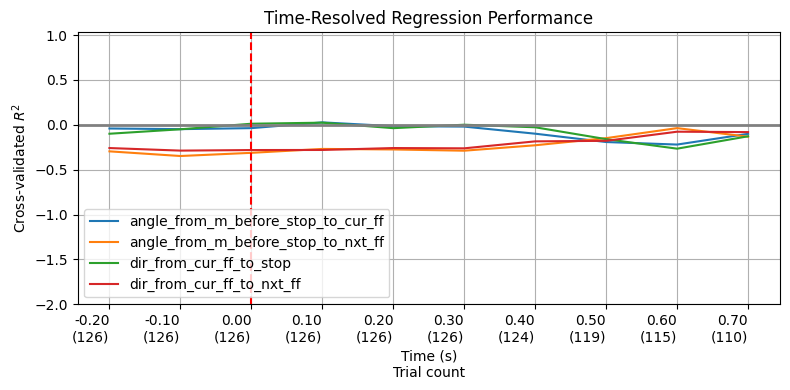

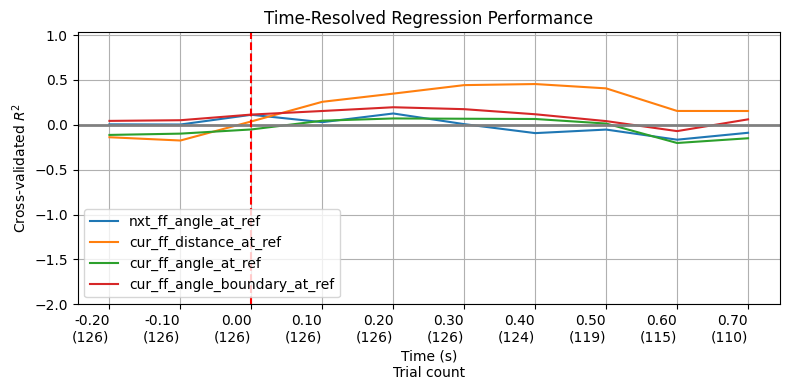

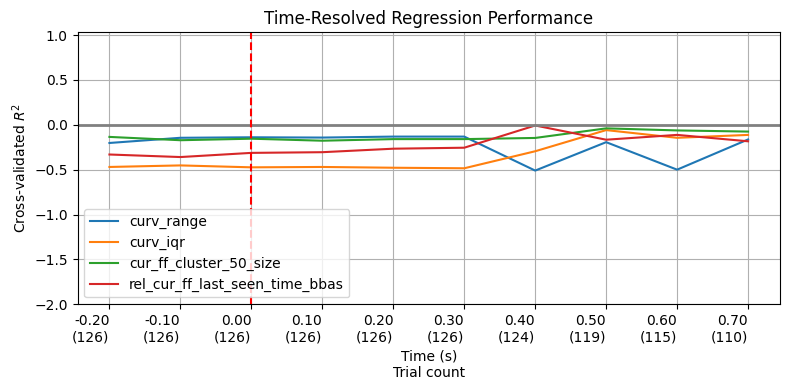

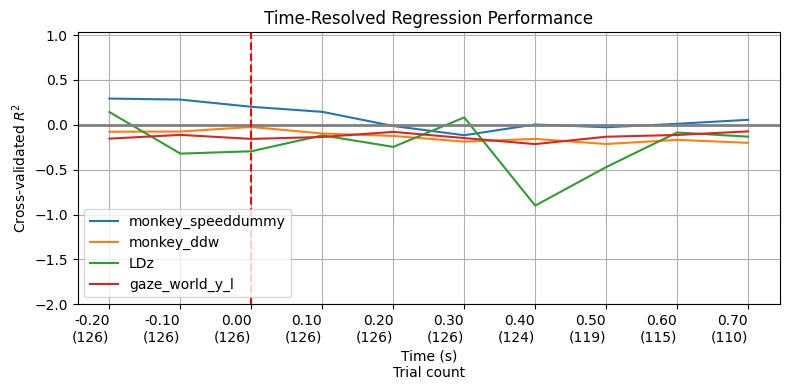

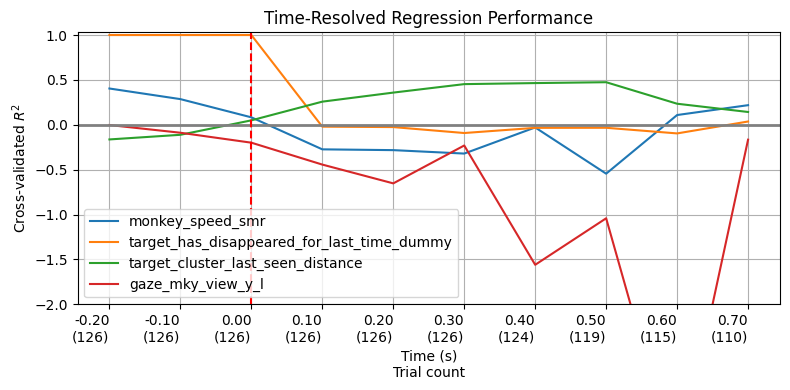

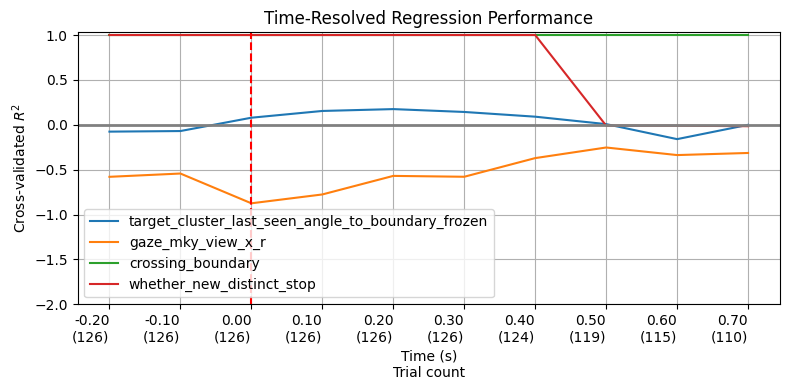

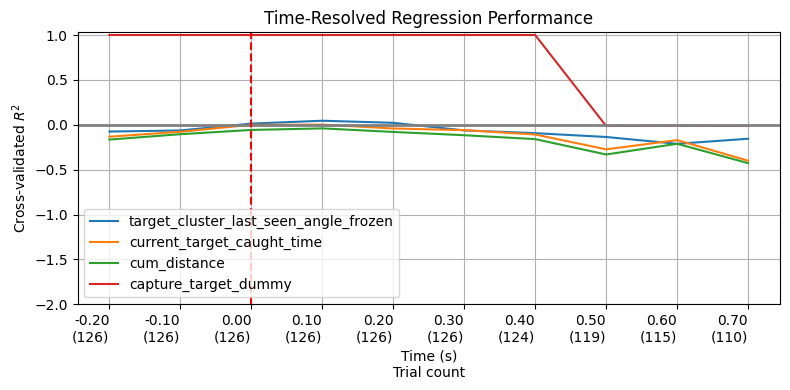

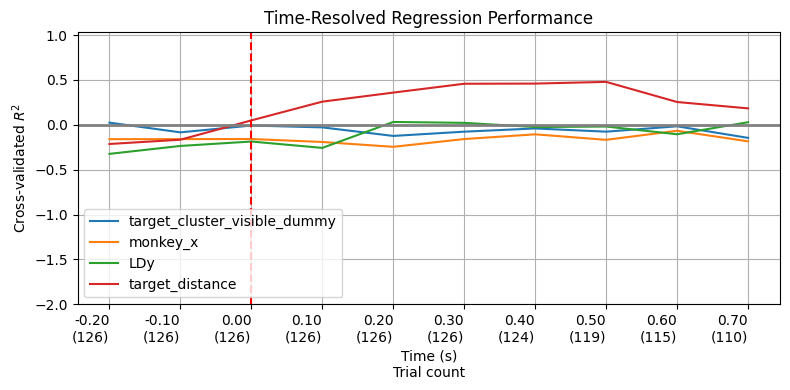

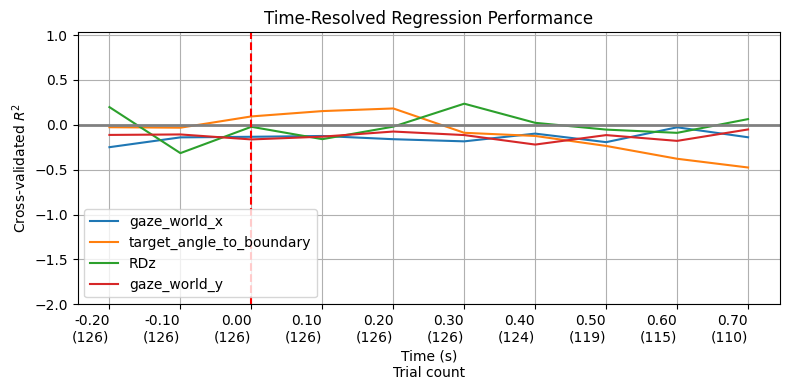

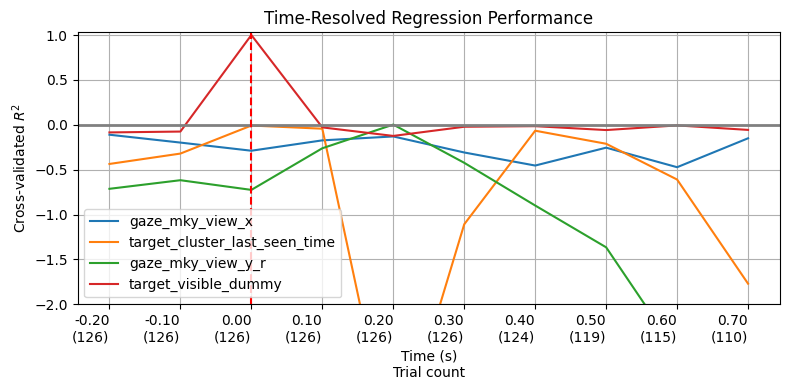

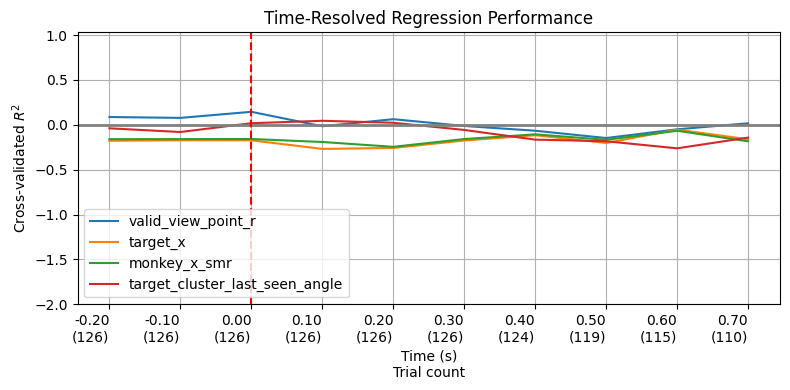

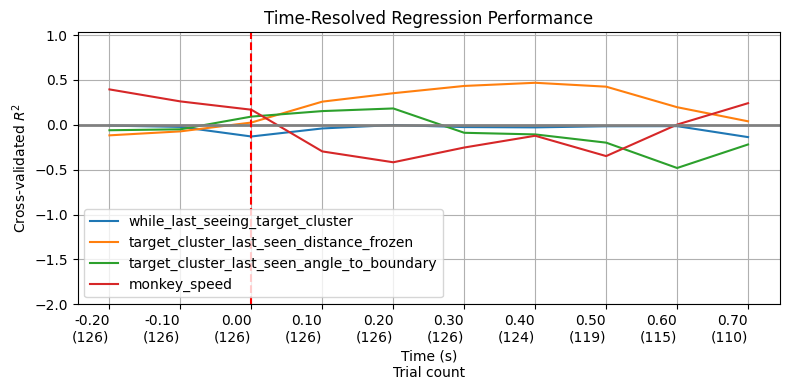

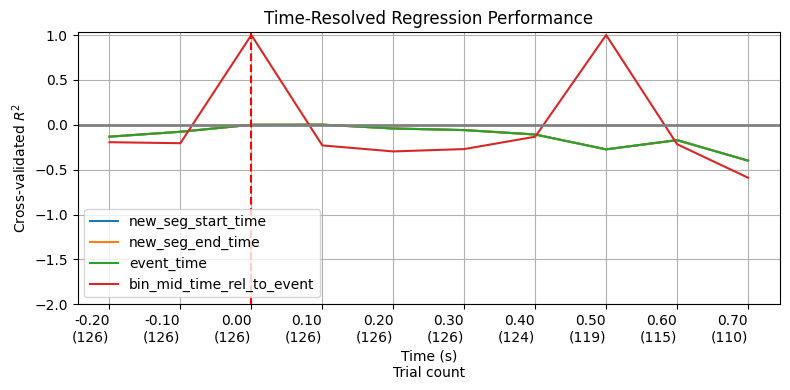

In [6]:
pn.time_resolved_regression_cv()
pn.plot_time_resolved_regression()
pn.plot_trial_counts_by_timepoint()

# cur ff last visible

In [7]:
# pn.streamline_preparing_event_aligned_data(cur_or_nxt='cur', first_or_last='last',
#                                            pre_event_window=1, post_event_window=0.75)

In [8]:
# pn.time_resolved_regression_cv()
# pn.plot_time_resolved_regression()
# pn.plot_trial_counts_by_timepoint()

# nxt ff first visible

Dropped 26 out of 152 segments because of insufficient duration, which is 17.1% of all segments
new_seg_duration is now 1.0, and post_event_window is now 0.5
Dropped 20 columns due to containing NA in rebinned_y_var via calling drop_na_cols function: ['cur_cntr_arc_curv', 'cur_opt_arc_curv', 'nxt_cntr_arc_curv', 'nxt_opt_arc_curv', 'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading', 'angle_opt_cur_end_to_nxt_ff', 'angle_cntr_cur_end_to_nxt_ff', 'target_last_seen_angle_to_boundary', 'monkey_y_target_last_seen', 'target_last_seen_angle', 'monkey_x_target_last_seen', 'time_since_target_last_seen', 'monkey_angle_target_last_seen', 'distance_from_monkey_pos_target_last_seen', 'd_heading_since_target_last_seen', 'cum_distance_since_target_last_seen', 'time_target_last_seen', 'cum_distance_when_target_last_seen', 'target_last_seen_distance']
Computing GPFA trajectories with 7 dimensions...
Initializing parameters using factor analysis...

Fitting GPFA model...
Saved GPFA trajectories to al

Timepoints: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


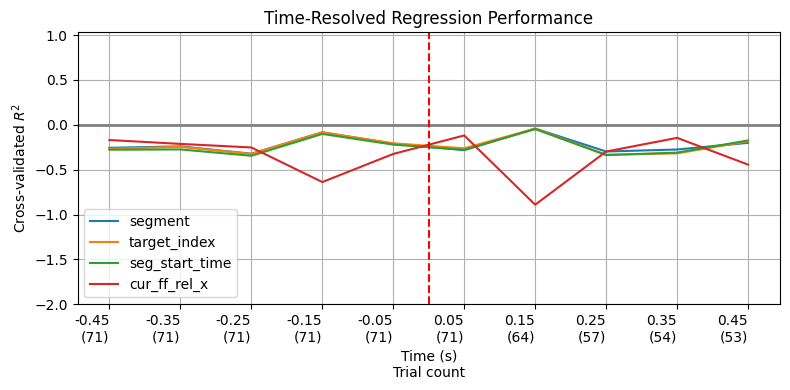

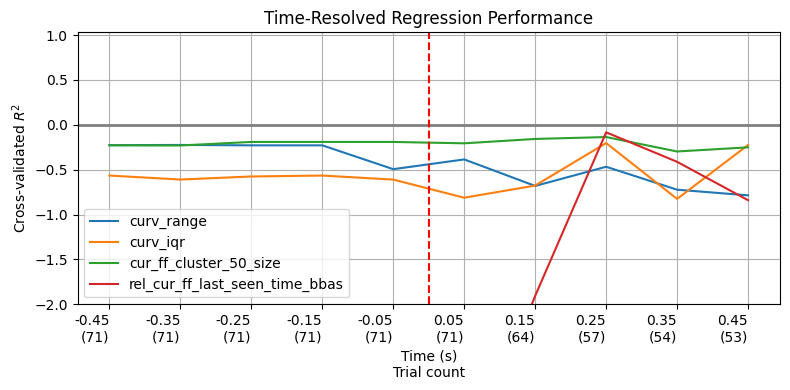

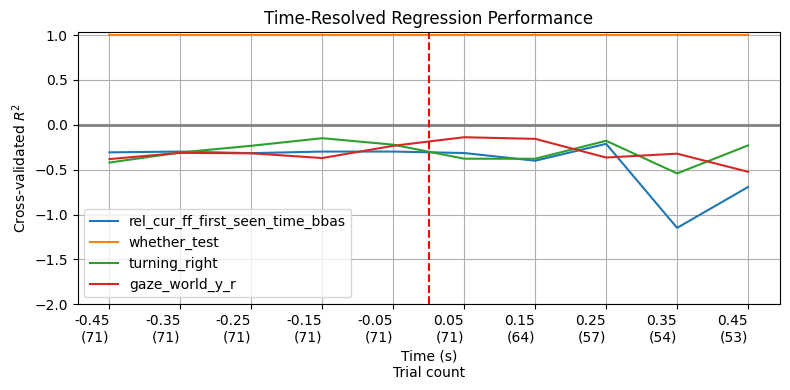

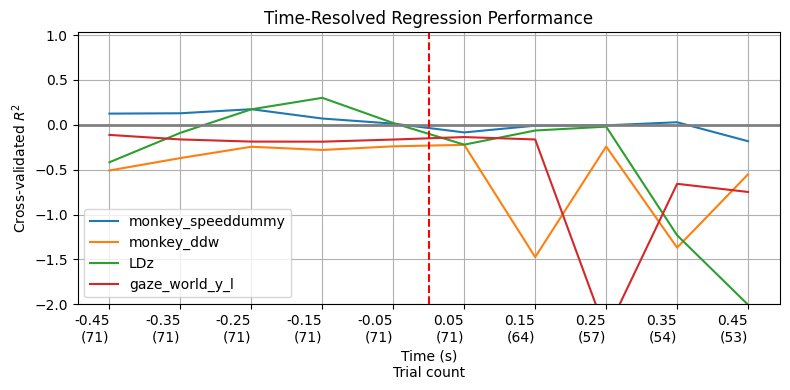

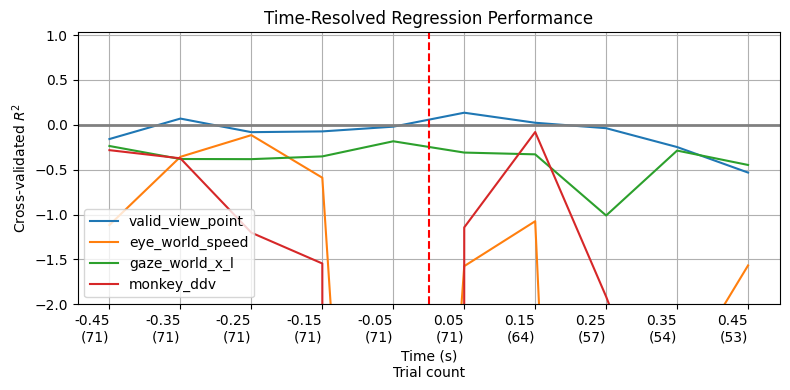

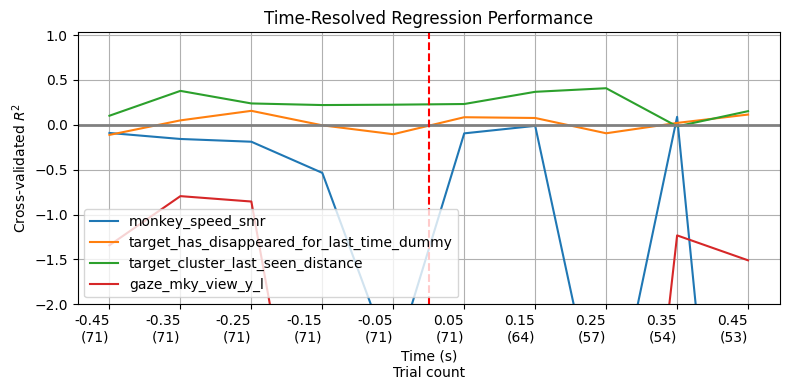

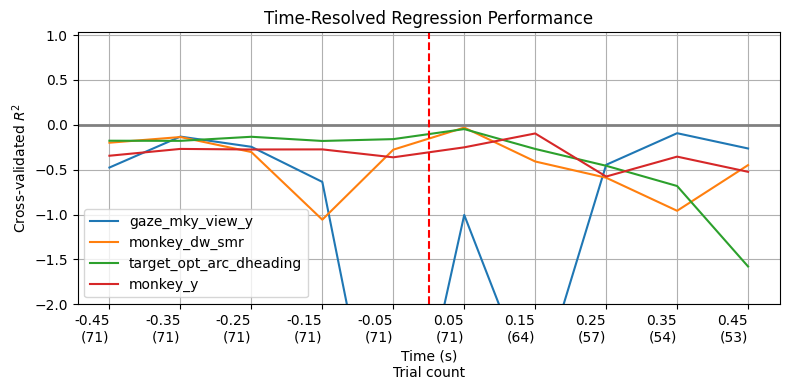

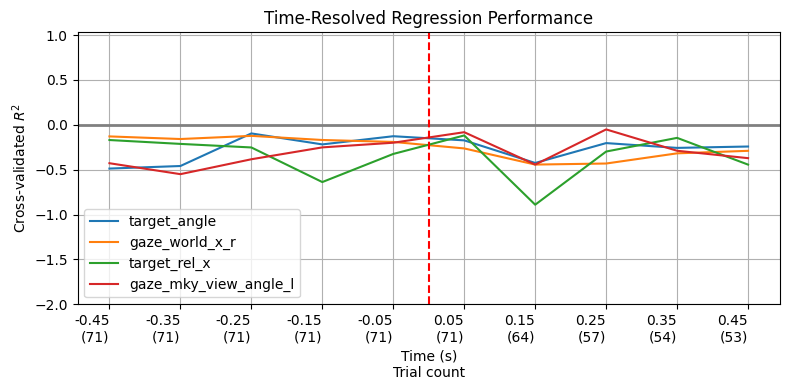

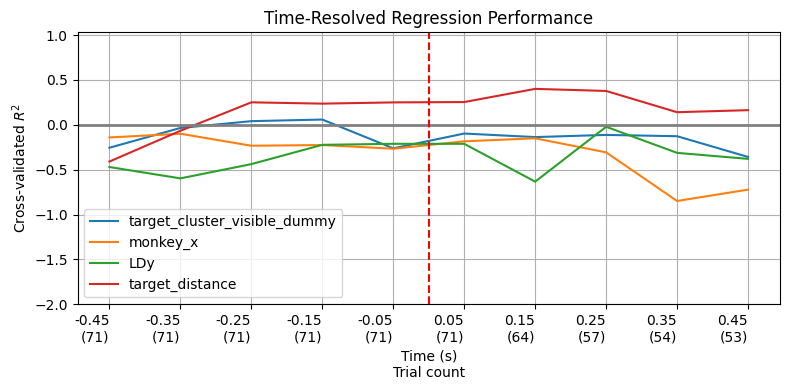

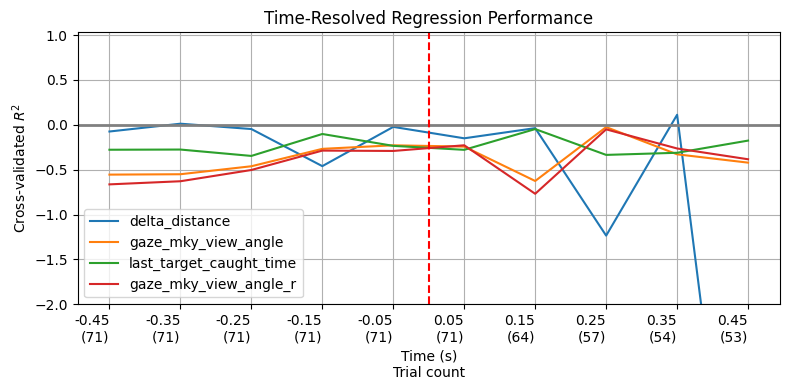

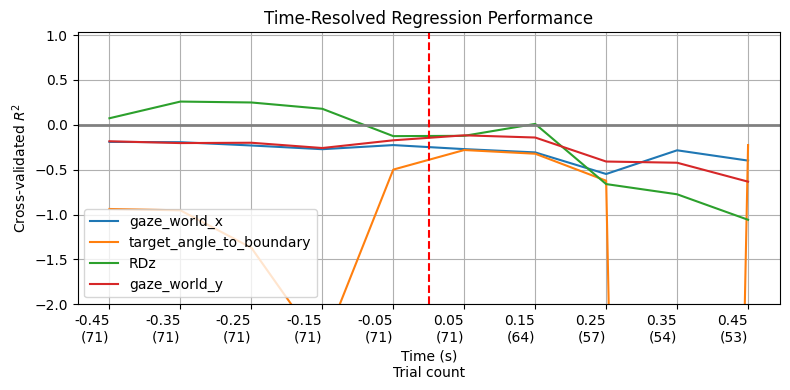

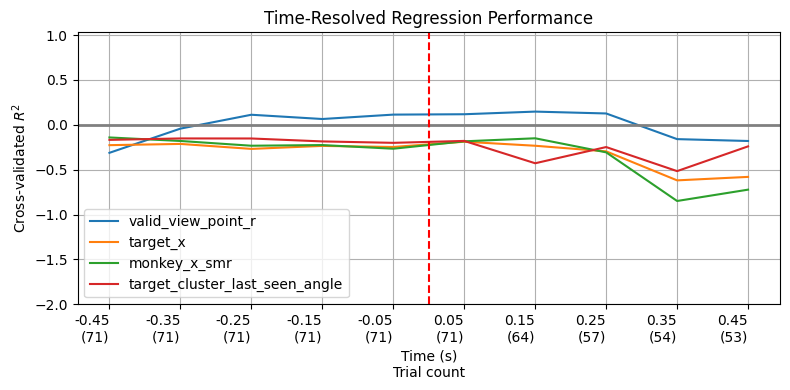

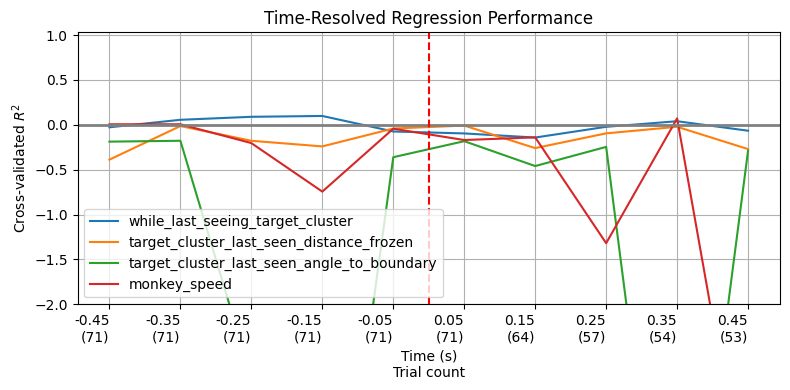

In [9]:
pn.streamline_preparing_event_aligned_data(cur_or_nxt='nxt', first_or_last='first',
                                           pre_event_window=0.5, post_event_window=0.5)

## see rel_nxt_ff_first_seen_time distribution

In [10]:
rel_seen_time_df = pn.planning_data_by_point[['rel_nxt_ff_first_seen_time_bbas', 'rel_cur_ff_last_seen_time_bbas']].drop_duplicates().reset_index(drop=True)
sns.histplot(rel_seen_time_df['rel_cur_ff_first_seen_time_bbas'], bins=50, label='cur ff first seen')
sns.histplot(rel_seen_time_df['rel_nxt_ff_first_seen_time_bbas'], bins=50, label='cur ff last seen')
plt.xlabel('Time relative to stop (s)')
plt.ylabel('Count')
plt.title('Time relative to stop')
plt.legend()
plt.show()

KeyError: "['rel_nxt_ff_first_seen_time_bbas'] not in index"

## check event time

In [ ]:
pn.planning_data_by_point.columns

Index(['cur_ff_index', 'nxt_cntr_arc_curv', 'stop_point_index',
       'cur_cntr_arc_curv', 'nxt_opt_arc_curv', 'nxt_opt_arc_dheading',
       'cur_opt_arc_curv', 'nxt_ff_angle', 'cur_opt_arc_dheading', 'segment',
       'nxt_ff_index', 'cur_ff_distance', 'seg_start_time', 'stop_time',
       'target_index', 'time_rel_to_stop', 'cur_ff_angle', 'nxt_ff_distance',
       'segment_duration', 'point_index', 'time', 'seg_end_time',
       'cur_opt_arc_end_heading', 'cur_cntr_arc_end_heading',
       'angle_opt_cur_end_to_nxt_ff',
       'angle_cntr_cur_end_to_nxt_ff', 'cur_ff_rel_x', 'cur_ff_rel_y',
       'nxt_ff_rel_x', 'nxt_ff_rel_y', 'curv_of_traj',
       'angle_from_m_before_stop_to_cur_ff',
       'angle_from_stop_to_nxt_ff', 'dir_from_cur_ff_to_stop',
       'dir_from_cur_ff_to_nxt_ff', 'dir_from_cur_ff_same_side',
       'angle_from_cur_ff_to_stop', 'angle_from_cur_ff_to_nxt_ff',
       'nxt_ff_distance_at_ref', 'nxt_ff_angle_at_ref',
       'cur_ff_distance_at_ref', 'cur_ff_angle_

In [ ]:
stop_time_info = pn.planning_data_by_point[['stop_time', 'segment']].drop_duplicates()
new_seg_info = pn.new_seg_info.merge(stop_time_info, on='segment', how='left')

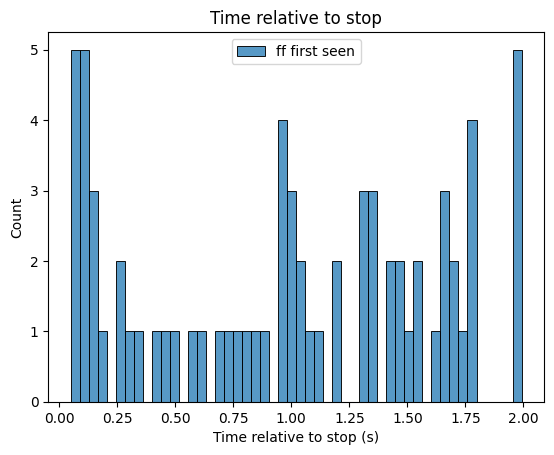

In [ ]:
rel_seen_time = new_seg_info['stop_time'] - new_seg_info['event_time']

sns.histplot(rel_seen_time, bins=50, label='ff first seen')
plt.xlabel('Time relative to stop (s)')
plt.ylabel('Count')
plt.title('Time relative to stop')
plt.legend()
plt.show()

event_time  segment  new_segment  new_seg_end_time  new_seg_start_time  \
0      24.71247        0            0          25.21247            24.21247   
1      28.08220        1            1          28.58220            27.58220   
2           NaN        2            2               NaN                 NaN   
3      50.85713        3            3          51.35713            50.35713   
4      56.88289        5            4          57.38289            56.38289   
..          ...      ...          ...               ...                 ...   
121         NaN      145          121               NaN                 NaN   
122         NaN      147          122               NaN                 NaN   
123         NaN      148          123               NaN                 NaN   
124  2316.33466      150          124        2316.83466          2315.83466   
125         NaN      151          125               NaN                 NaN   

     new_seg_duration  stop_time  
0             1.00000   25.01125  
1             1.00000   29.41040  
2             1.00000   31.90023  
3             1.00000   50.94039  
4             1.00000   56.98268  
..                ...        ...  
121           1.00000 2285.25989  
122           1.00000 2292.04920  
123           1.00000 2294.55570  
124           1.00000 2316.74978  
125           1.00000 2393.73961  

[126 rows x 7 columns]

# exp

## Schro

In [ ]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

reduce_y_var_lags = False
planning_data_by_point_exists_ok = True
y_data_exists_ok = False

pn = pn_aligned_by_event.PlanningAndNeuralEventAligned(raw_data_folder_path=raw_data_folder_path)
pn.prep_data_to_analyze_planning(planning_data_by_point_exists_ok=planning_data_by_point_exists_ok)
pn.planning_data_by_point, cols_to_drop = general_utils.drop_columns_with_many_nans(
    pn.planning_data_by_point)

Loaded binned_spikes_df from all_monkey_data/processed_neural_data/monkey_Schro/data_0416/binned_spikes_df_0p1.csv
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/test/cur_vis_0_1_window_-50cm_0cm
Loaded planning_data_by_point from all_monkey_data/planning_and_neural/monkey_Schro/data_0416/planning_data_by_point/opt_arc_stop_closest/control/cur_vis_0_1_window_-50cm_0cm
Overlap: []
Percentage overlap relative to df1: 0.00%
Percentage overlap relative to df2: 0.00%
Average percentage overlap: 0.00%
Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
There are 1 duplicated point_index in bin_info. Note: one_point_index_per_bin is False


In [ ]:
pn.load_raw_data()

Note: ff_caught_T_sorted is replaced with ff_caught_T_new


In [ ]:
spikes_df = neural_data_processing.make_spikes_df(pn.raw_data_folder_path, pn.ff_caught_T_sorted,
                                                            sampling_rate=pn.sampling_rate)

In [ ]:
rates.sort_values(ascending=True)

unit_79    0.13795
unit_61    0.37622
unit_80    0.52031
unit_56    0.59663
unit_55    0.61775
unit_29    0.68658
unit_85    0.83240
unit_39    0.96651
unit_84    1.42470
unit_76    1.46214
unit_43    1.55085
unit_82    1.55574
unit_36    1.92389
unit_4     1.92965
unit_62    1.97112
unit_33    2.20862
unit_5     2.23867
unit_38    2.34926
unit_13    2.47252
unit_70    2.64551
unit_63    2.74323
unit_51    2.86794
unit_35    2.89770
unit_77    3.11407
unit_25    3.44037
unit_45    3.45986
unit_31    3.51343
unit_54    3.51515
unit_71    3.55710
unit_40    3.57851
unit_7     3.70705
unit_68    3.76158
unit_83    4.30435
unit_59    4.33065
unit_26    4.49020
unit_66    4.49702
unit_37    4.62114
unit_48    4.93650
unit_52    5.10661
unit_47    5.31243
unit_27    5.33911
unit_78    5.57095
unit_9     5.76851
unit_73    6.01283
unit_16    6.04047
unit_21    6.16882
unit_74    6.34728
unit_2     6.47515
unit_67    6.53121
unit_30    6.67924
unit_41    6.76074
unit_15    7.00189
unit_8     7

In [ ]:
rates.min()

0.13794890994441722

In [ ]:
rates

unit_0         9.99645
unit_1        13.51727
unit_2         6.47515
unit_3        22.83597
unit_4         1.92965
unit_5         2.23867
unit_6         7.59103
unit_7         3.70705
unit_8         7.04183
unit_9         5.76851
unit_10       13.69429
unit_11       13.02950
unit_12       16.45634
unit_13        2.47252
unit_14       17.48111
unit_15        7.00189
unit_16        6.04047
unit_17        9.95776
unit_18       15.16094
unit_19        8.91762
unit_20       10.16368
unit_21        6.16882
unit_22        7.89400
unit_23       11.46886
unit_24       10.31919
unit_25        3.44037
unit_26        4.49020
unit_27        5.33911
unit_28        9.04098
unit_29        0.68658
unit_30        6.67924
unit_31        3.51343
unit_32       14.02941
unit_33        2.20862
unit_34       19.22530
unit_35        2.89770
unit_36        1.92389
unit_37        4.62114
unit_38        2.34926
unit_39        0.96651
unit_40        3.57851
unit_41        6.76074
unit_42       18.97762
unit_43    

<Axes: ylabel='Count'>

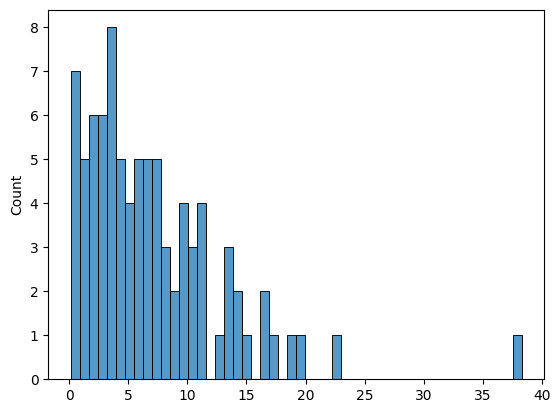

In [ ]:
time = pn.binned_spikes_df['bin'].max() * pn.bin_width
rates = pn.binned_spikes_df.sum(axis=0)/ time
rates = rates.iloc[:-1]
sns.histplot(rates.values, bins=50)